In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [26]:
df = pd.read_csv('water_potability.csv')
df.sample(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1538,7.256015,196.649823,44184.230460,5.265558,260.425605,324.250148,8.148929,69.375044,4.534960,1
3057,7.985406,200.134697,17583.080335,6.771729,296.569823,377.584203,10.289288,66.890747,4.752452,0
403,7.088941,206.364122,13839.713426,8.088242,321.296141,369.969333,14.896092,66.674658,5.661104,1
1654,5.899937,205.913786,30379.359441,9.446148,312.283210,512.336528,6.306055,55.065243,3.858979,0
678,4.168248,164.351289,23863.716864,8.593819,NaN,547.466831,13.843494,71.046735,2.804525,1


In [4]:
df.shape

(3276, 10)

# Analysis  (unfinished)


![pH scale](https://blog.jencoi.com/hs-fs/hubfs/103211917_m.jpg?width=1200&name=103211917_m.jpg)

The data includes **3276 water** samples and **10 features** , incl.
- **pH** is a measure of how acidic/basic water is. The range goes from 0 - 14, with 7 being neutral. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5
- **Hardness** Capacity of water to precipitate soap in mg/L
- **Solids (Total dissolved solids - TDS)** represents the total concentration of dissolved substances in water.
- **Chloramines** are disinfectants used to treat drinking water.
- **Sulfate** Amount of Sulfates dissolved in mg/L
- **Conductivity** Electrical conductivity of water in μS/cm
- **Organic_carbon** Amount of organic carbon in ppm
- **Trihalomethanes** Amount of Trihalomethanes in μg/L
- **Turbidity** Measure of light emiting property of water in NTU (Nephelometric Turbidity Units)
- **Potability** Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

In [5]:
features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 
            'Organic_carbon', 'Trihalomethanes', 'Turbidity']

<Figure size 864x576 with 0 Axes>

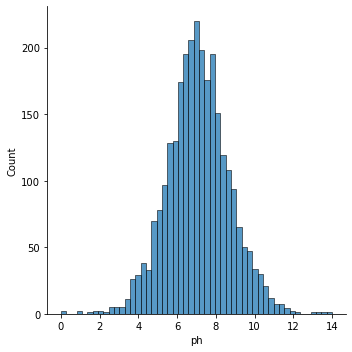

<Figure size 864x576 with 0 Axes>

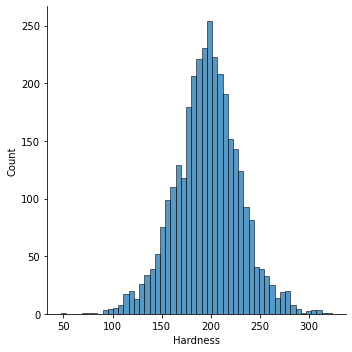

<Figure size 864x576 with 0 Axes>

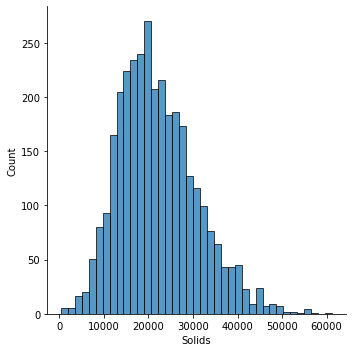

<Figure size 864x576 with 0 Axes>

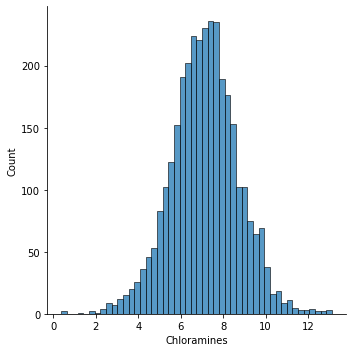

<Figure size 864x576 with 0 Axes>

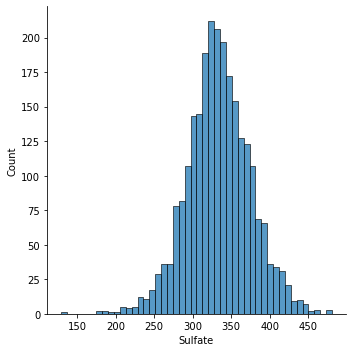

<Figure size 864x576 with 0 Axes>

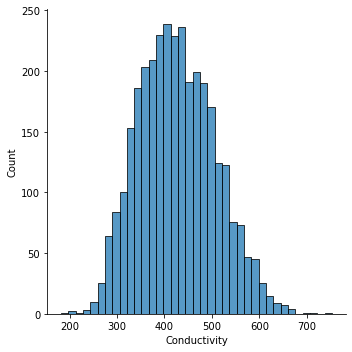

<Figure size 864x576 with 0 Axes>

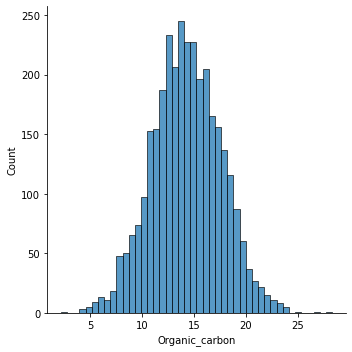

<Figure size 864x576 with 0 Axes>

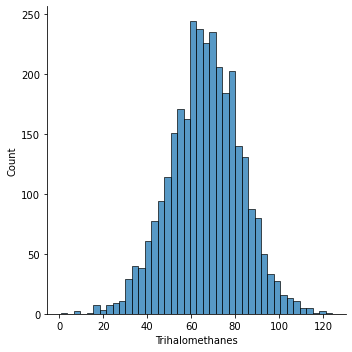

<Figure size 864x576 with 0 Axes>

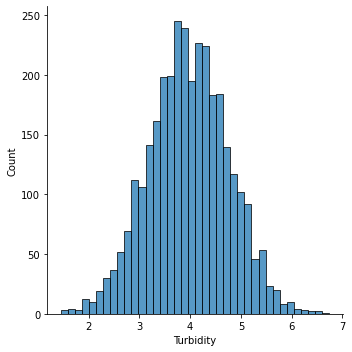

In [6]:
for col in features:
    plt.figure(figsize=(12, 8))
    sns.displot(df[col])
    plt.show()

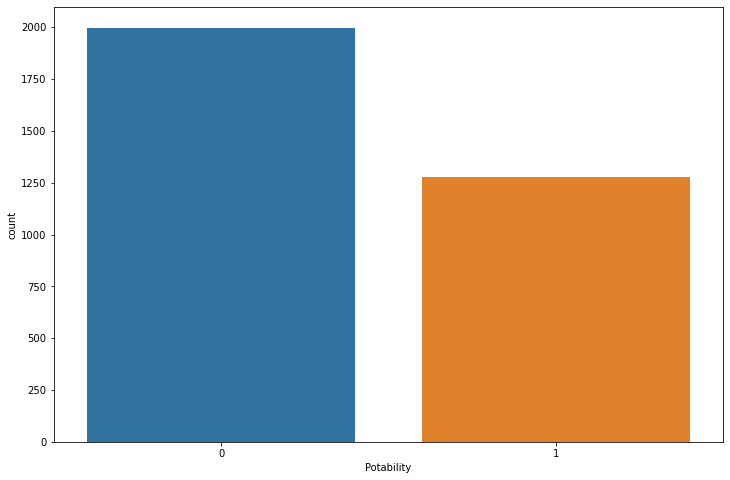

In [7]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Potability')
plt.show()

# Null Values

In [30]:
for i in df.columns:
    if df[i].isnull().sum()>0:
        print("There are {} null values in {} column".format(df[i].isnull().sum(),i))

In [29]:
df["Trihalomethanes"].fillna(value=df["Trihalomethanes"].mean(), inplace=True)

In [28]:
df["Sulfate"].fillna(value=df["Sulfate"].mean(), inplace=True)

In [27]:
df['ph'].fillna(value=df['ph'].mean(), inplace=True)

# Models

In [47]:
X = df.drop(['Potability'], axis = 1)
y = df['Potability']

In [48]:
#Standardizing The Data
sc = StandardScaler()
X = sc.fit_transform(X)

In [49]:
#Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X, y)

acc_decision_tree = round(decision_tree.score(X, y) * 100, 2)
acc_decision_tree

100.0

In [50]:
#Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X, y)

random_forest.score(X, y)
acc_random_forest = round(random_forest.score(X, y) * 100, 2)
acc_random_forest

100.0

In [51]:
#KNeighbors Classifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X, y)

acc_knn = round(knn.score(X, y) * 100, 2)
acc_knn

80.98

In [52]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X, y)

acc_log = round(logreg.score(X, y) * 100, 2)
acc_log

61.02

In [53]:
models = pd.DataFrame({
    'Model': [ 'KNN', 'Logistic Regression', 
              'Random Forest',
              'Decision Tree'],
    'Score': [ acc_knn, acc_log, 
              acc_random_forest, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Random Forest,100.00
3,Decision Tree,100.00
0,KNN,80.98
1,Logistic Regression,61.02
